In [1]:
import networkx as nx
import numpy as np
import polars as pl
import powerlaw
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from collections import Counter
from itertools import combinations

# import read_citation_graph from read_networks.py
from read_networks import read_citation_graph

This notebooks illustrates how you read network data, and show desticriptive statistics including degree distributions.

# Case of "History" Citation Network

You can shoose "Physics" Citation network as well.

In [15]:
field = 'History'  # or 'Physics'

# read graph as undirected graph
g = read_citation_graph(field=field, graph=nx.DiGraph())  # you can set graph=nx.Graph() to read "undirected" graph

In [16]:
print(f"# of nodes: {g.number_of_nodes()}")
print(f"# of edges: {g.number_of_edges()}")

# of nodes: 902
# of edges: 968


# Descriptive statistics

## Degree distribution

In [17]:
def compare_distributions(fit, dist1: str ='power_law', dist2: str ='lognormal'):
    # compare distribution
    print('== compare distribution ==')
    R, p = fit.distribution_compare(dist1, dist2)
    if p <= 0.05:
        print('HIGHLY')
    if R >= 0:
        print(dist1)
    else:
        print(dist2)
    print(f"R: {R}, p-value: {p}")
    return R, p

def plot_distribution(fit, ax=None):
    fig, ax = plt.subplots()
    # plot empirical data
    ax = fit.plot_ccdf(ax, linewidth=3, label='Empirical data')
    # plot fit
    fit.lognormal_positive.plot_ccdf(ax=ax, color='g', linestyle='--', label='Fit(lognormal)')

    plt.xlabel('degree')
    plt.ylabel(u"p(X≥x)")
    ax.legend()


Calculating best minimal value for power law fit
== compare distribution ==
lognormal
R: -0.6513003947423137, p-value: 0.3385670478692616


/home/kk929/.cache/pypoetry/virtualenvs/class-network-Bf3B6n9_-py3.11/lib/python3.11/site-packages/powerlaw.py:1507: RuntimeWarning: overflow encountered in divide
  likelihoods = f/C
/home/kk929/.cache/pypoetry/virtualenvs/class-network-Bf3B6n9_-py3.11/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


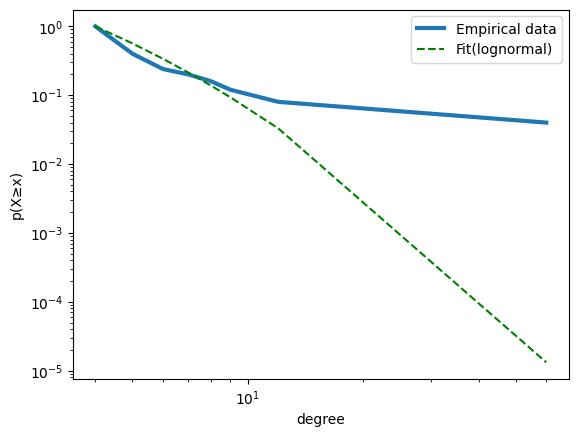

In [18]:
# physics
indegree_values = list(dict(g.in_degree()).values())
# fitting
data = np.array(indegree_values)
data = data[data != 0] # drop 0
fit = powerlaw.Fit(data)

R, p = compare_distributions(fit)

plot_distribution(fit)

# Visualize 

(it should be done by [cytoscape](https://cytoscape.org/)/[gephi](https://gephi.org/)/other tools ...)

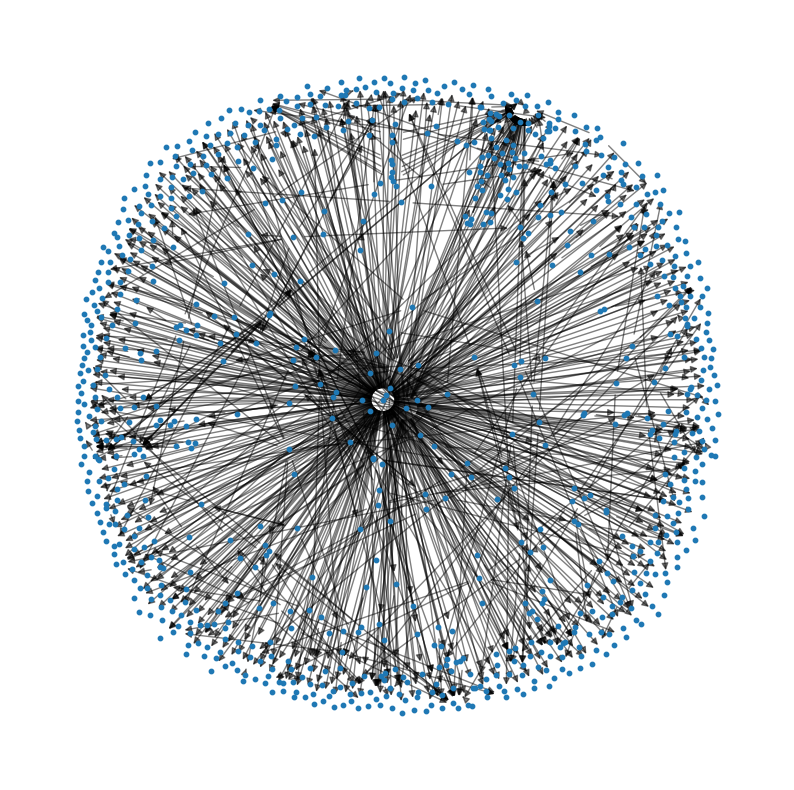

In [14]:
# plot network (History) it can be done because it is small
# plot
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(g, k=0.1)
nx.draw_networkx_nodes(g, pos, node_size=10)
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.axis('off')
plt.show()
